### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Матюхин Григорий Васильевич
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №27 
1. Набор данных: wine_quality 
2. Независимая переменная: features/residual sugar 
3. Зависимая переменная: features/density 
4. Доп. признак: имеющий максимальную дисперсию 
5. Визуализация доп. признака – диаграмма размаха 
6. Показатель качества регрессии – MAE (mean absolute error) 
7. Степень полинома: 5 
8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – гиперболический тангенс. 

# Шаг 1: Загружаем датасет

In [1]:
X = "features/residual sugar"
Y = "features/density"

In [2]:
import tensorflow_datasets as tfds

In [3]:
ds = tfds.load("wine_quality", split="train")
df = tfds.as_dataframe(ds)
len(df)

2024-04-26 01:59:33.251776: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 01:59:33.254628: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 01:59:33.302379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 01:59:34.293222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-26 01:59:36.446857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


4898

In [4]:
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


Все признаки принимают числовые значения. Оставляем их все в датасете.

# Шаг 2: Удаляем выбросы

Считаем Z-score:

In [5]:
from scipy.stats import zscore

In [6]:
scores = df.apply(zscore)
scores

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,-1.230617,0.376625,0.048001,2.264640,0.883181,0.511127,0.210175,2.357979,0.527131,1.379953,0.414339,-0.991374
1,1.369962,0.788604,1.287594,-0.978854,-0.657501,-0.018117,1.269882,-1.023637,-0.612079,-1.091000,-0.081770,0.137870
2,0.557281,-0.767763,-1.852708,-1.092538,-1.842641,-1.723457,2.130893,-1.043355,-0.086290,-2.055848,1.505780,-2.120618
3,-1.230617,2.940054,-0.530475,0.900367,-0.301959,-0.900190,-0.717069,0.849561,-0.699710,-0.832138,1.307336,0.137870
4,1.207426,-0.493110,-0.282557,-1.293180,-1.131557,1.275590,-0.650838,-0.510972,-1.313131,-0.079086,0.612783,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.638550,0.239298,0.874397,-1.152729,-0.538987,0.217102,-0.518374,-1.023637,2.279762,-0.385013,-1.173210,1.267114
4894,0.232209,0.193523,-0.530475,0.244968,-0.894529,0.922761,0.210175,1.007304,-1.050236,-0.126152,-0.379435,0.137870
4895,-1.474421,0.239298,2.113989,1.615937,1.475751,1.452004,-1.511848,1.421380,-0.874974,-0.102619,0.811227,-0.991374
4896,0.069673,-0.676212,-0.447836,2.983538,-0.064931,-0.488556,-0.849532,3.876256,-0.612079,-0.385013,1.704223,0.137870


In [7]:
old_df = df
df = df[abs(scores) < 3]

Проверим наличие `NaN` в данных

In [8]:
df.isnull().any()

features/alcohol                 False
features/chlorides                True
features/citric acid              True
features/density                  True
features/fixed acidity            True
features/free sulfur dioxide      True
features/pH                       True
features/residual sugar           True
features/sulphates                True
features/total sulfur dioxide     True
features/volatile acidity         True
quality                           True
dtype: bool

Уберем их

In [9]:
df.dropna(inplace=True)
df.isnull().any()

features/alcohol                 False
features/chlorides               False
features/citric acid             False
features/density                 False
features/fixed acidity           False
features/free sulfur dioxide     False
features/pH                      False
features/residual sugar          False
features/sulphates               False
features/total sulfur dioxide    False
features/volatile acidity        False
quality                          False
dtype: bool

Сравним размер данных до и после

In [10]:
len(df)/len(old_df)

0.9160881992650062

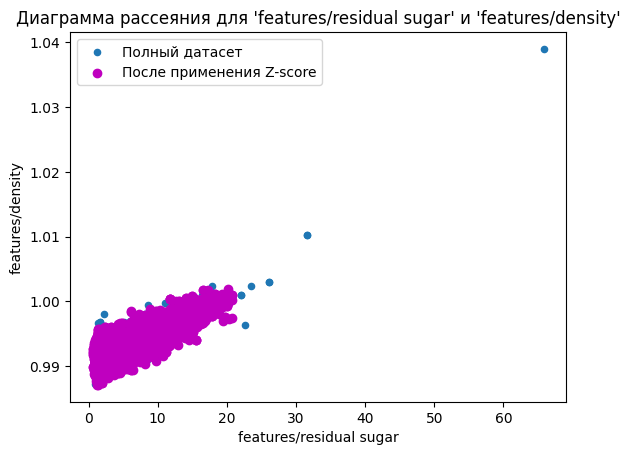

In [11]:
plot = old_df.plot.scatter(
    "features/residual sugar",
    "features/density",
    title=f"Диаграмма рассеяния для '{X}' и '{Y}'",
    label="Полный датасет"
)
plot.scatter(df[X], df[Y], color="m", label="После применения Z-score")
plot.legend()

# Шаг 3: Линейная и полиномиальные регрессии

## Стандартизация и масштабирование призанков

In [12]:
import numpy as np

<Axes: title={'center': "Стандартизованный 'features/residual sugar'"}, xlabel='features/residual sugar', ylabel='features/density'>

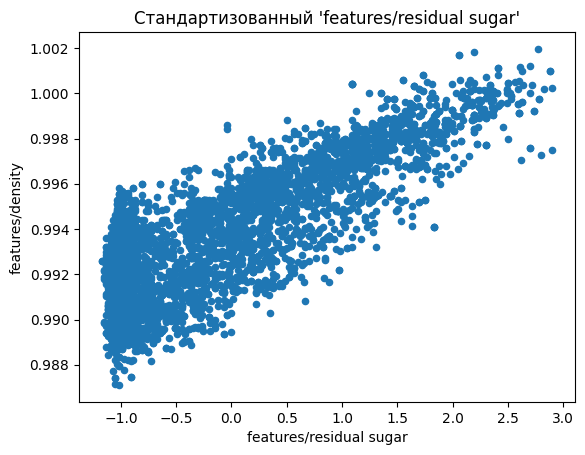

In [13]:
mean_x, std_x = np.mean(df[X]), np.std(df[X])
df[X] = (df[X] - mean_x)/std_x
df.plot.scatter(X, Y, title=f"Стандартизованный '{X}'")

<Axes: title={'center': "Стандартизованный 'features/residual sugar' и\nмасштабированный на [-1; 1] 'features/density'"}, xlabel='features/residual sugar', ylabel='features/density'>

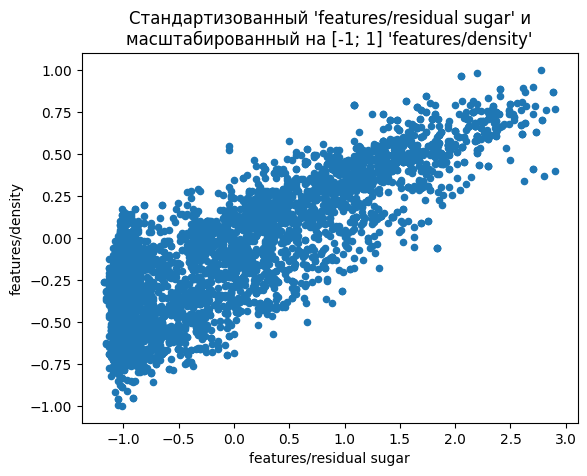

In [14]:
min_y, max_y = np.min(df[Y]), np.max(df[Y])
df[Y] = ((df[Y] - min_y)/(max_y - min_y) - 0.5) * 2
df.plot.scatter(X, Y, title=f"Стандартизованный '{X}' и\nмасштабированный на [-1; 1] '{Y}'")

## Линейная регрессия с одним нейроном

In [15]:
import tensorflow as tf

In [16]:
lin_reg_one = tf.keras.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(1)
])
lin_reg_one.summary()

lin_reg_one.compile(
    loss=tf.keras.losses.MAE,
    metrics=["MAE"]
)

lin_reg_one_hist = lin_reg_one.fit(df[X], df[Y], epochs=100, verbose=0, validation_split=0.3)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## Полиномиальная регрессия с одним нейроном

In [17]:
df[X].shape

(4487,)

In [18]:
x = np.reshape(df[X], (len(df[X]), 1))
x.shape

(4487, 1)

In [19]:
x2 = np.hstack([x, x**5])
x2.shape

(4487, 2)

In [20]:
pol_reg_one = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(1)
])
pol_reg_one.summary()

pol_reg_one.compile(
    loss=tf.keras.losses.MAE,
    metrics=["MAE"]
)

pol_reg_one_hist = pol_reg_one.fit(x2, df[Y], epochs=100, verbose=0, validation_split=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

## Оценка качества

In [21]:
_, lin_reg_mae = lin_reg_one.evaluate(df[X], df[Y])
_, pol_reg_mae = pol_reg_one.evaluate(x2, df[Y])

if lin_reg_mae < pol_reg_mae:
    print("Линейная регрессия лучше")
else:
    print("Полиномиальная регрессия лучше")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - MAE: 0.1709 - loss: 0.1709
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - MAE: 0.1720 - loss: 0.1720
Линейная регрессия лучше


# Шаг 4: Кривые обучения

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plot_loss(title, history, squeze=0.3):
    plt.figure()
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(title)
    plt.ylim([min(history.history["loss"]) * (1 - squeze), max(history.history['loss']) * squeze])
    plt.xlabel("Эпохи обучения")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.grid(True)

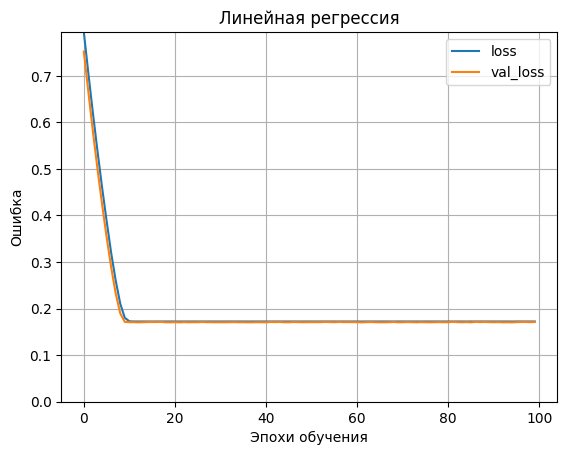

In [24]:
plot_loss("Линейная регрессия", lin_reg_one_hist, 1)

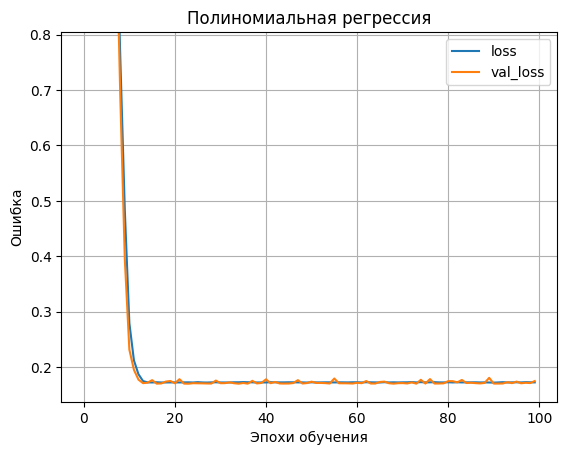

In [25]:
plot_loss("Полиномиальная регрессия", pol_reg_one_hist, 0.2)

# Шаг 5: Сравнение результатов на графе

In [26]:
lin_reg_pred = lin_reg_one.predict(df[X])
pol_reg_pred = pol_reg_one.predict(x2)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


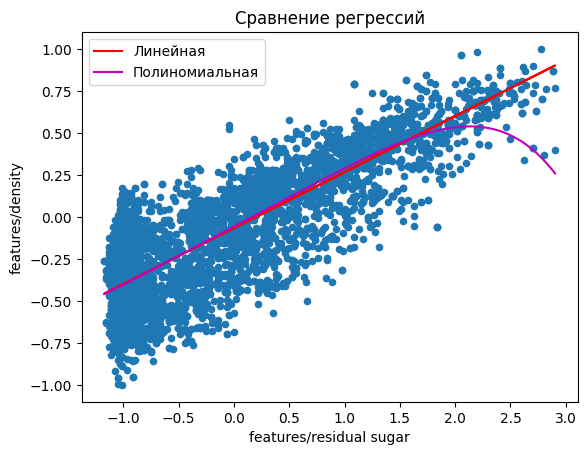

In [27]:
plot = df.plot.scatter(X, Y, title="Сравнение регрессий")
plot.plot(df[X], lin_reg_pred, color="r", label="Линейная")
plot.plot(np.sort(df[X]), pol_reg_pred[np.argsort(df[X])], color="m", label="Полиномиальная")
plot.legend()

# Шаг 6: Поиск дополнительного признака

In [28]:
df2 = df.drop(columns=[X, Y])
df2.head()

,features/alcohol,features/chlorides,features/citric acid,features/fixed acidity,features/free sulfur dioxide,features/pH,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,7.6,44.0,3.22,0.55,197.0,0.32,5.0
1,12.2,0.063,0.49,6.3,35.0,3.38,0.42,92.0,0.27,6.0
2,11.2,0.029,0.11,5.3,6.0,3.51,0.48,51.0,0.43,4.0
3,9.0,0.110,0.27,6.6,20.0,3.08,0.41,103.0,0.41,6.0
4,12.0,0.035,0.30,5.9,57.0,3.09,0.34,135.0,0.34,6.0


In [29]:
X2 = df2.var().idxmax()
X2

'features/total sulfur dioxide'

# Шаг 7: Стандартизация и визуализация дополнительного признака

<Axes: title={'center': "Диаграмма размаха для 'features/total sulfur dioxide'"}>

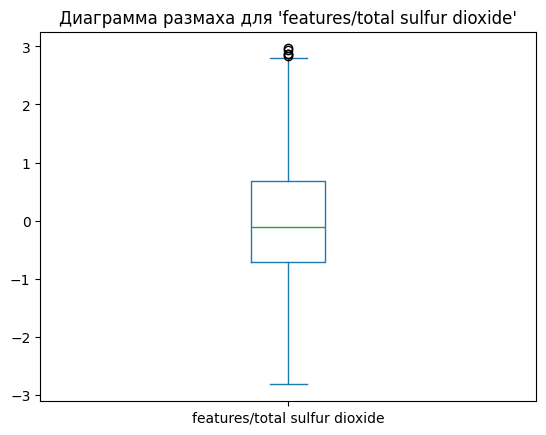

In [30]:
mean_x2, std_x2 = np.mean(df[X2]), np.std(df[X2])
df[X2] = (df[X2] - mean_x2)/std_x2
df[X2].plot.box(title=f"Диаграмма размаха для '{X2}'")

# Шаг 8: Нейронная сеть со скрытыми слоями

## Создание набора входных данных

In [31]:
in_data = np.array(df[[X, X2]])
out_data = np.array(df[Y])
in_data.shape, out_data.shape

((4487, 2), (4487,))

In [32]:
from mpl_toolkits.mplot3d import Axes3D

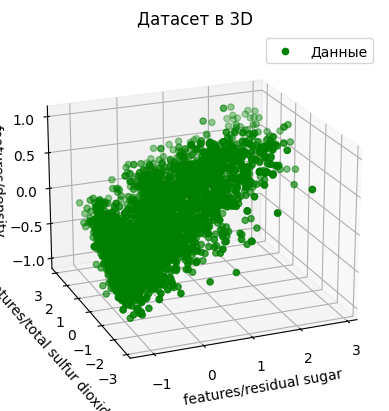

In [33]:
plt.style.use("default")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.set_xlabel(X)
ax.set_ylabel(X2)
ax.set_zlabel(Y)

ax.scatter(in_data[:,0], in_data[:,1], out_data, label="Данные", color="g")
ax.view_init(azim=-112, elev=21)
ax.set_title("Датасет в 3D")
ax.legend()

## Глубокая нейронная сеть

In [34]:
feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature_normalizer.adapt(in_data)

In [35]:
large_model = tf.keras.Sequential([
    tf.keras.layers.Input((2,)),
    feature_normalizer,
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dense(64, activation="tanh"),
    tf.keras.layers.Dense(1)
])
large_model.summary()

large_model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.05)
)

large_model_history = large_model.fit(in_data, out_data, epochs=500, verbose=0, validation_split=0.3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,740 (49.77 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 3 (16.00 B)

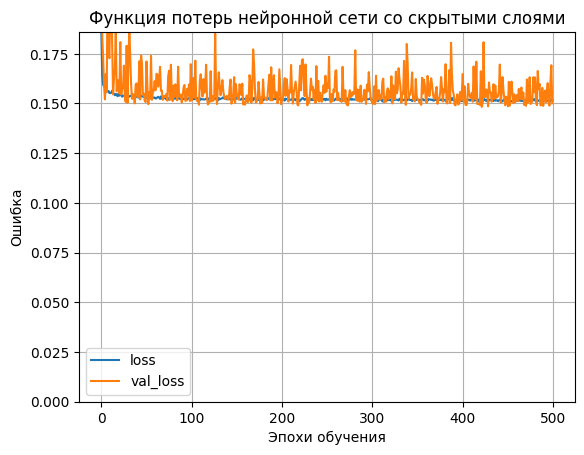

In [36]:
plot_loss("Функция потерь нейронной сети со скрытыми слоями", large_model_history, 1)

# Шаг 9: Поверхность в трехмерном пространстве

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


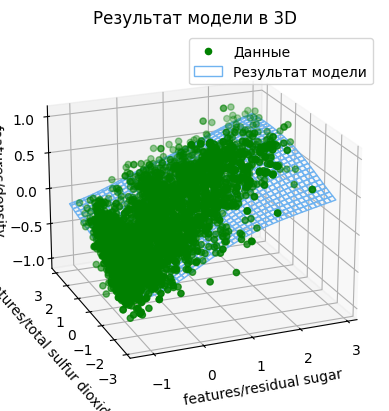

In [37]:
plt.style.use("default")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.set_xlabel(X)
ax.set_ylabel(X2)
ax.set_zlabel(Y)
ax.scatter(in_data[:,0], in_data[:,1], out_data, label="Данные", color="g")

x = np.arange(min(in_data[:,0]), max(in_data[:,0]), 0.1)
y = np.arange(min(in_data[:,1]), max(in_data[:,1]), 0.1)
x, y = np.meshgrid(x, y)
points = np.array(list(zip(np.ravel(x), np.ravel(y))))
z = large_model.predict(points)
z = z.reshape(x.shape)

ax.plot_surface(x, y, z, facecolor=(0,0,0,0), edgecolor='#70b3f0', label="Результат модели")

ax.view_init(azim=-112, elev=21)
ax.set_title("Результат модели в 3D")
ax.legend()

# Шаг 10: Разбиение на выборки

In [38]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(in_data, out_data, 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3141, 2), (1346, 2), (3141,), (1346,))

In [40]:
def my_rmse(y_test, y_predict):
    return np.sqrt(np.sum((y_predict - y_test)**2) / len(y_test))

In [41]:
nelements = 60
train_score = []
test_score = []
for i in range(nelements + 1, len(X_train) + 1, nelements):
    large_model = tf.keras.Sequential([
        tf.keras.layers.Input((2,)),
        feature_normalizer,
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(64, activation="tanh"),
        tf.keras.layers.Dense(1)
    ])
    
    large_model.compile(
        loss=tf.keras.losses.MAE,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.05)
    )
    large_model.fit(X_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(my_rmse(y_train[:i], y_train_predict))

    y_test_predict = large_model.predict(X_test)
    test_score.append(my_rmse(y_test, y_test_predict))
    print('-->', i, ' done')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
--> 61  done
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
--> 121  done
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
--> 181  done
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
--> 241  done
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
--> 301  done
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
--> 361  done
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
--> 421  done
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
--> 481  done
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
--> 541  done
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
--> 601  done
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━

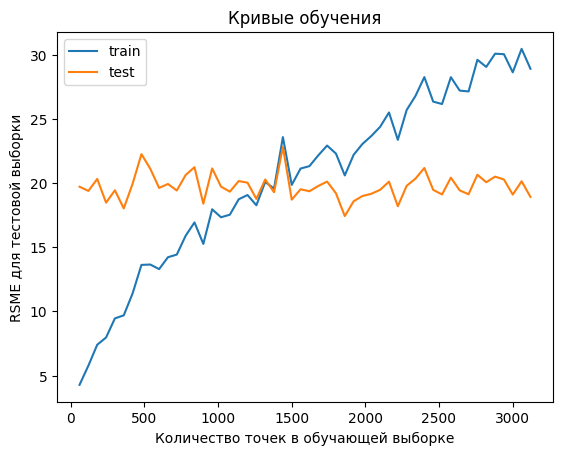

In [42]:
plt.figure()
plt.title("Кривые обучения")
plt.xlabel("Количество точек в обучающей выборке")
plt.ylabel("RSME для тестовой выборки")
plt.plot([i for i in range(nelements + 1, len(X_train) + 1, nelements)],
                               train_score, label="train")
plt.plot([i for i in range(nelements + 1, len(X_train) + 1, nelements)],
                               test_score, label="test")
plt.legend();